In [25]:
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
%matplotlib inline
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [26]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    # plt.show(im)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

## MNIST Data

In [27]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [28]:
mnist.keys()

dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])

In [29]:
mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [30]:
images = np.reshape(mnist['data'], (70000, 28, 28))
labels = mnist['target'].astype(int)
n=len(images)
images.shape, labels.shape

((70000, 28, 28), (70000,))

In [31]:
images = images/255

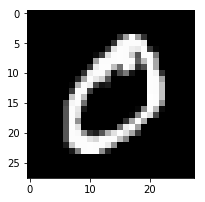

In [32]:
plot(images[0])

In [33]:
labels[0]

0

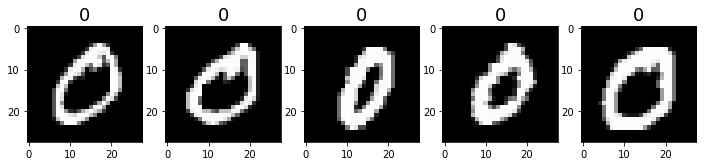

In [34]:
plots(images[:5], titles=labels[:5])

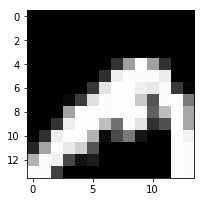

In [35]:
plot(images[0,0:14, 8:22])

## Edge Detection

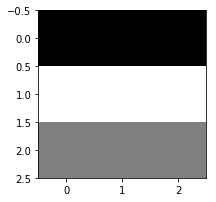

In [36]:
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)

In [37]:
dims = np.index_exp[10:28:1,3:13]
images[0][dims]

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.1882,  0.9333,  0.9882,  0.9882],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.149 ,  0.6471,  0.9922,  0.9137,  0.8157],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.0275,  0.698 ,  0.9882,  0.9412,  0.2784,  0.0745],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.2235,  0.9882,  0.9882,  0.2471,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.7765,  0.9922,  0.7451,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.298 ,  0.9647,  0.9882,  0.4392,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.3333,  0.9882,  0.902 ,  0.098 ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.3333,  0.9882,  0.8745,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.3333,  0.9882,  0.5686,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.3373,  0.9922,  0.8824,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0

In [38]:
corrtop = correlate(images[0], top)

In [39]:
corrtop[dims]

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.1882,  0.9216,  0.9765,  0.7843, -0.2392],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.149 ,  0.6078,  0.6667,  0.4431, -0.1882, -0.6196],
       [ 0.    ,  0.    ,  0.    ,  0.0275,  0.5765,  0.9176,  0.8392, -0.3451, -1.4275, -1.5961],
       [ 0.    ,  0.    ,  0.    ,  0.1961,  0.4863,  0.4863, -0.4039, -0.9725, -1.0471, -0.4627],
       [ 0.    ,  0.    ,  0.    ,  0.5529,  0.5569,  0.3137, -0.4863, -0.4902, -0.2471,  0.    ],
       [ 0.    ,  0.    ,  0.298 ,  0.4863,  0.4824, -0.1216, -0.3098, -0.3059,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.0353,  0.0588, -0.0275, -0.4039, -0.4275, -0.3412,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.0275, -0.1255, -0.1255, -0.098 ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.3059, -0.3059, -0.3059,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.0039,  0.0078,  0.3216,  0.3176,  0.3137,  0.    ,  0.    ,  0.    ],
       [ 0

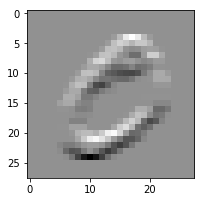

In [40]:
plot(corrtop)

In [41]:
np.rot90(top, 1)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

False

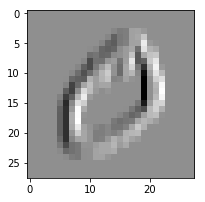

In [42]:
convtop = convolve(images[0], np.rot90(top,1))
plot(convtop)
np.allclose(convtop, corrtop)

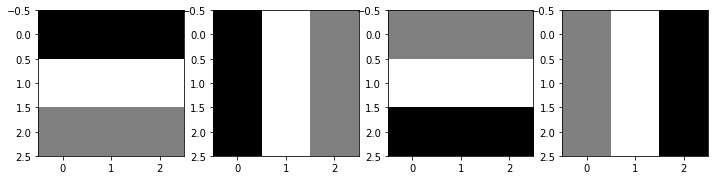

In [43]:
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

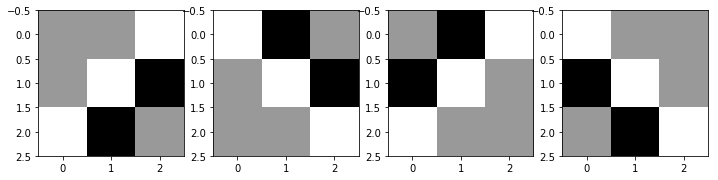

In [44]:
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

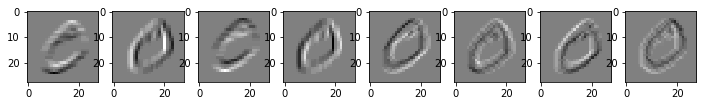

In [45]:
rots = straights + diags
corrs = [correlate(images[0], rot) for rot in rots]
plots(corrs)